In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
stock = pd.read_csv('FEYE.csv', parse_dates=True)
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-09-20,40.299999,44.889999,35.279999,36.000000,36.000000,16876000
1,2013-09-23,35.250000,38.480000,35.250000,37.450001,37.450001,2404100
2,2013-09-24,37.549999,38.400002,36.240002,37.009998,37.009998,1219500
3,2013-09-25,37.500000,40.000000,37.250000,38.799999,38.799999,994700
4,2013-09-26,39.450001,41.779999,39.000000,41.630001,41.630001,1097200


In [3]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083 entries, 0 to 1082
Data columns (total 7 columns):
Date         1083 non-null object
Open         1083 non-null float64
High         1083 non-null float64
Low          1083 non-null float64
Close        1083 non-null float64
Adj Close    1083 non-null float64
Volume       1083 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 59.3+ KB


In [4]:
last_year = stock[(stock.Date >= '2017-01-01') & (stock.Date <= '2017-12-31')]
last_year.head()

,Date,Open,High,Low,Close,Adj Close,Volume
827,2017-01-03,11.67,12.440,11.58,12.30,12.30,4835900
828,2017-01-04,12.33,12.730,12.16,12.67,12.67,5316700
829,2017-01-05,12.67,13.155,12.51,12.59,12.59,4210600
830,2017-01-06,12.61,12.710,12.42,12.54,12.54,3204900
831,2017-01-09,12.57,12.730,12.40,12.69,12.69,2510800


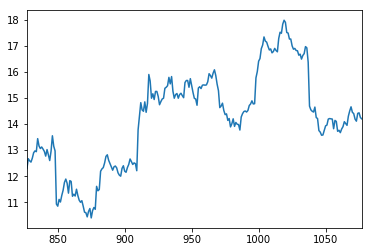

In [5]:
plotted = last_year['Adj Close'].plot(x=last_year.Date)
plotted

In [6]:
# Just need the Adj Close and Date
last_year = last_year[['Date', 'Adj Close']]
last_year = last_year.dropna(subset=['Adj Close', 'Date'])
last_year.set_index('Date', inplace=True)
last_year.head()

,Adj Close
Date,
2017-01-03,12.30
2017-01-04,12.67
2017-01-05,12.59
2017-01-06,12.54
2017-01-09,12.69


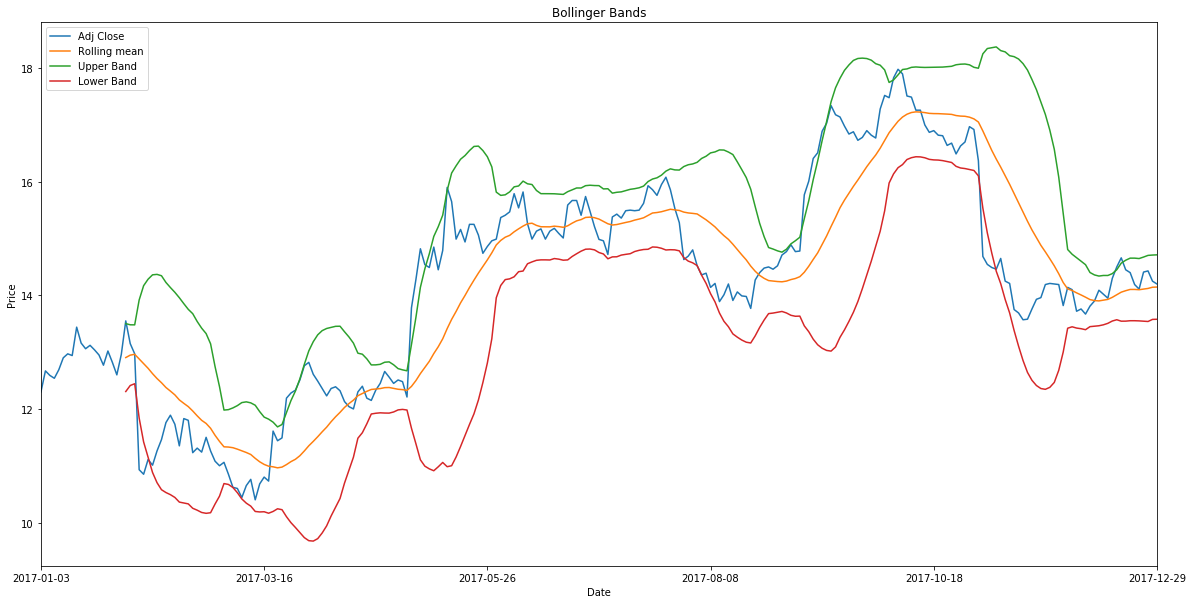

In [7]:
# Get the rolling mean and the rolling standard deviation
deviate        = 2
window         = 20
adj_close      = last_year['Adj Close']
rolling_window = adj_close.rolling(window=window)
rolling_mean   = rolling_window.mean()
rolling_std    = rolling_window.std()

# Calculate the Bollinger Bands
upper_band = rolling_mean + (rolling_std * deviate)
lower_band = rolling_mean - (rolling_std * deviate)

# Plot
ax = adj_close.plot(title="Bollinger Bands", label='Adj Close', figsize=(20, 10))
rolling_mean.plot(label='Rolling mean', ax=ax)
upper_band.plot(label='Upper Band', ax=ax)
lower_band.plot(label='Lower Band', ax=ax)

 # Add axis labels and legend
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend(loc='upper left')

plt.show()
# plt.savefig('bolinger.png')

C:\Users\Andrew\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


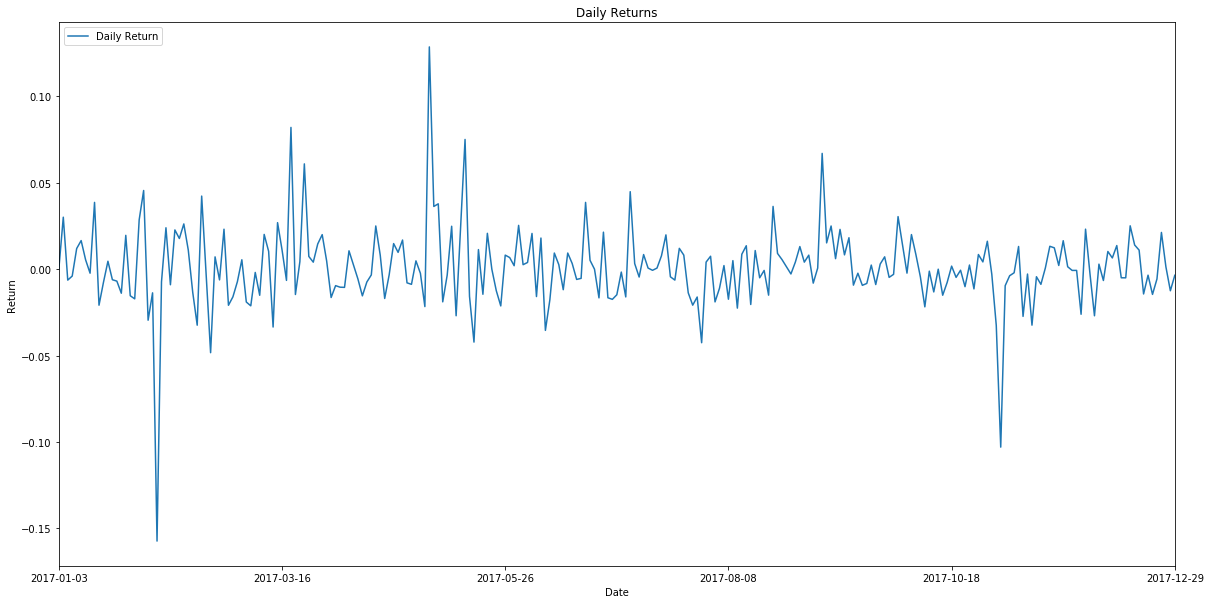

In [15]:
# Calculating daily returns of 2017

daily_returns = stock[(stock.Date >= '2017-01-01') & (stock.Date <= '2017-12-31')].copy()
daily_returns['DailyReturns'] = (stock['Adj Close'] / stock['Adj Close'].shift(1)) - 1 # Pandas
daily_returns.reindex()

daily_returns.DailyReturns.iloc[0] = 0
daily_returns.head()

# ploting the daily returns
returns = daily_returns[['Date', 'DailyReturns']]
returns.set_index('Date', inplace=True)

ax = returns.DailyReturns.plot(figsize=(20, 10), label='Daily Return', title='Daily Returns')
ax.set_xlabel("Date")
ax.set_ylabel("Return")
ax.legend(loc='upper left')
plt.show()